In [61]:
import numpy as np
import math as m
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from tqdm import tqdm
from sympy import *
#from autograd import grad

In [62]:
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

def derivative(func, x, dx = 1e-6):
    return (func(x + dx) - func(x - dx)) / (2 * dx)

In [63]:
# defininf the states
# defininsg coefficeients sybols

def Creating_states(coeff, Abstract = False):    # coeff list like [a0,a1,b0,b1]
    if Abstract == True:
        a0 = symbols('a0')
        a1 = symbols('a1')
        b0 = symbols('b0')
        b1 = symbols('b1')
    else:
        a0 = coeff[0]
        a1 = coeff[1]
        b0 = coeff[2]
        b1 = coeff[3]
    psi0 = [a0,a1]      # defining states
    psi1 = [b0,b1]
    return([psi0,psi1])

In [64]:
def roundc(c, digits):
    if c.imag == 0:
        return round(c.real, digits)
    else:
        return round(c.real, digits) + round(c.imag, digits) * 1j

In [65]:
# creating the SIC POVM matrices
w = m.e**((2/3)*m.pi*(1j))
POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrix

In [66]:
'''def np_out(a,f0,f1,t0,t1):

    w0 = (np.cos(a))**2
    w1 = (np.sin(a))**2
    a0 = np.cos(t0)
    b0 = np.sin(t0)
    a1 = np.cos(t1)
    b1 = np.sin(t1)
    
    y1 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*np.sqrt(2)*np.cos(f0)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*np.sqrt(2)*np.cos(f1)*a1*b1)) #p1
    y2 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*np.sqrt(2)*np.cos(f0)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*np.sqrt(2)*np.cos(f1)*a1*b1)) #p2
    y3 = (1/6)*(w0*(a0**4 + b0**4 - 2*np.cos(2*f0)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*np.cos(2*f1)*(a1**2)*(b1**2))) #p3
    y4 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*np.sqrt(2)*np.cos(f0 + 2*np.pi/3)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*np.sqrt(2)*np.cos(f1 + 2*np.pi/3)*a1*b1)) #p4
    y5 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*np.sqrt(2)*np.cos(f0 - 2*np.pi/3)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*np.sqrt(2)*np.cos(f1 - 2*np.pi/3)*a1*b1)) #p5
    y6 = (1/6)*(w0*(a0**4 + b0**4 - 2*np.cos(2*f0 - 2*np.pi/3)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*np.cos(2*f1 - 2*np.pi/3)*(a1**2)*(b1**2))) #p6
    y7 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*np.sqrt(2)*np.cos(f0 - 2*np.pi/3)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*np.sqrt(2)*np.cos(f1 - 2*np.pi/3)*a1*b1)) #p7
    y8 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*np.sqrt(2)*np.cos(f0 - 2*np.pi/3)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*np.sqrt(2)*np.cos(f1 - 2*np.pi/3)*a1*b1)) #p8
    y9 = (1/6)*(w0*(a0**4 + b0**4 - 2*np.cos(2*f0 + 2*np.pi/3)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*np.cos(2*f1 + 2*np.pi/3)*(a1**2)*(b1**2))) #p9

    return [y1,y2,y3,y4,y5,y6,y7,y8,y9]'''

'def np_out(a,f0,f1,t0,t1):\n\n    w0 = (np.cos(a))**2\n    w1 = (np.sin(a))**2\n    a0 = np.cos(t0)\n    b0 = np.sin(t0)\n    a1 = np.cos(t1)\n    b1 = np.sin(t1)\n    \n    y1 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*np.sqrt(2)*np.cos(f0)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*np.sqrt(2)*np.cos(f1)*a1*b1)) #p1\n    y2 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*np.sqrt(2)*np.cos(f0)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*np.sqrt(2)*np.cos(f1)*a1*b1)) #p2\n    y3 = (1/6)*(w0*(a0**4 + b0**4 - 2*np.cos(2*f0)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*np.cos(2*f1)*(a1**2)*(b1**2))) #p3\n    y4 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*np.sqrt(2)*np.cos(f0 + 2*np.pi/3)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*np.sqrt(2)*np.cos(f1 + 2*np.pi/3)*a1*b1)) #p4\n    y5 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*np.sqrt(2)*np.cos(f0 - 2*np.pi/3)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*np.sqrt(2)*np.cos(f1 - 2*np.pi/3)*a1*b1)) #p5\n    y6 = (1/6)*(w0*(a0**4 + b0**4 - 2*np.cos(2*f0 - 2*np.pi/3)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*np.cos(2*f1 -

In [67]:
def sympy_out(a,f0,f1,t0,t1):

    a, f0, f1, t0, t1 = symbols('a f0 f1 t0 t1')

    w0 = cos(a)**2
    w1 = sin(a)**2
    a0 = cos(t0)
    b0 = sin(t0)
    a1 = cos(t1)
    b1 = sin(t1)

    y1 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*sqrt(2)*cos(f0)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*sqrt(2)*cos(f1)*a1*b1)) #p1
    y2 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*sqrt(2)*cos(f0)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*sqrt(2)*cos(f1)*a1*b1)) #p2
    y3 = (1/6)*(w0*(a0**4 + b0**4 - 2*cos(2*f0)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*cos(2*f1)*(a1**2)*(b1**2))) #p3
    y4 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*sqrt(2)*cos(f0 + 2*pi/3)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*sqrt(2)*cos(f1 + 2*pi/3)*a1*b1)) #p4
    y5 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*sqrt(2)*cos(f0 - 2*pi/3)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*sqrt(2)*cos(f1 - 2*pi/3)*a1*b1)) #p5
    y6 = (1/6)*(w0*(a0**4 + b0**4 - 2*cos(2*f0 - 2*pi/3)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*cos(2*f1 - 2*pi/3)*(a1**2)*(b1**2))) #p6
    y7 = (1/6)*(w0*(b0**2)*(1 + a0**2 - 2*sqrt(2)*cos(f0 - 2*pi/3)*a0*b0) + w1*(b1**2)*(1 + a1**2 - 2*sqrt(2)*cos(f1 - 2*pi/3)*a1*b1)) #p7
    y8 = (1/6)*(w0*(a0**2)*(1 + b0**2 - 2*sqrt(2)*cos(f0 - 2*pi/3)*a0*b0) + w1*(a1**2)*(1 + b1**2 - 2*sqrt(2)*cos(f1 - 2*pi/3)*a1*b1)) #p8
    y9 = (1/6)*(w0*(a0**4 + b0**4 - 2*cos(2*f0 + 2*pi/3)*(a0**2)*(b0**2)) + w1*(a1**4 + b1**4 - 2*cos(2*f1 + 2*pi/3)*(a1**2)*(b1**2))) #p9

    return [y1, y2, y3, y4, y5, y6, y7, y8, y9]

In [68]:
'''def floss(ny,a,f0,f1,t0,t1):
    y_pred = np_out(a,f0,f1,t0,t1)
    log_likelihood = -np.dot(ny, np.log(y_pred))
    return log_likelihood'''

'def floss(ny,a,f0,f1,t0,t1):\n    y_pred = np_out(a,f0,f1,t0,t1)\n    log_likelihood = -np.dot(ny, np.log(y_pred))\n    return log_likelihood'

In [69]:
def sym_floss(ny,a,f0,f1,t0,t1):
    
    y_pred = sympy_out(a,f0,f1,t0,t1)
    log_y_pred = [log(y) for y in y_pred]

     # Convert ny and y_pred to SymPy matrices
    ny = Matrix(ny)
    log_y_pred = Matrix(log_y_pred)
    
    # Compute the dot product
    log_likelihood = -ny.dot(log_y_pred)
    
    return log_likelihood

In [70]:
def update_lr(lr, i):
    return lr/(i+1)

In [71]:
def grad_fid(learning_rate, N, coeff, priors, POVM_elts):
    
    initial_states = Creating_states(Abstract=False, coeff = coeff)     # Creating the two states with these coefficients
    psi0 = initial_states[0]
    psi1 = initial_states[1]    # created the states to be discriminated

    psi0sq = []
    psi1sq = []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    psi0psi0 = [psi0sq[0], np.sqrt(psi0sq[1]**2+psi0sq[2]**2), psi0sq[3]]    
    psi1psi1 = [psi1sq[0], np.sqrt(psi1sq[1]**(2)+psi1sq[2]**(2)), psi1sq[3]]    # creating square states
    
    vec_psi0psi0 = np.array(psi0psi0)     
    vec_psi1psi1 = np.array(psi1psi1)
    rho = priors[0]*np.outer(vec_psi0psi0, np.conj(vec_psi0psi0)) + priors[1]*np.outer(vec_psi1psi1, np.conj(vec_psi1psi1))     # theoretical density matrix with priors 1/2 each.

    prob_vec =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [i.real for i in prob_vec if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]

    ##################################### GRaDIENT DESCENT ##############################################
    
    # Initialize parameters
    pars = [np.pi/4, np.pi/4, np.pi/4, np.pi/4, np.pi/4]  # [a, f0, f1, t0, t1]

    a, f0, f1, t0, t1 = symbols('a f0 f1 t0 t1')
    # Create a list of symbolic variables with the same length as nj_vec
    nj_vec_sym = symbols('n:%d' % len(nj_vec))

    # Compute the derivatives
    df_da = diff(sym_floss(nj_vec_sym, a, f0, f1, t0, t1), a)
    df_df0 = diff(sym_floss(nj_vec_sym, a, f0, f1, t0, t1), f0)
    df_df1 = diff(sym_floss(nj_vec_sym, a, f0, f1, t0, t1), f1)
    df_dt0 = diff(sym_floss(nj_vec_sym, a, f0, f1, t0, t1), t0)
    df_dt1 = diff(sym_floss(nj_vec_sym, a, f0, f1, t0, t1), t1)

    # Convert the derivatives to NumPy functions
    df_da_np = lambdify((*nj_vec_sym, a, f0, f1, t0, t1), df_da, 'numpy')
    df_df0_np = lambdify((*nj_vec_sym, a, f0, f1, t0, t1), df_df0, 'numpy')
    df_df1_np = lambdify((*nj_vec_sym, a, f0, f1, t0, t1), df_df1, 'numpy')
    df_dt0_np = lambdify((*nj_vec_sym, a, f0, f1, t0, t1), df_dt0, 'numpy')
    df_dt1_np = lambdify((*nj_vec_sym, a, f0, f1, t0, t1), df_dt1, 'numpy')

    # Create a list to store the loss at each epoch
    #loss_history = []

    # Train for N epochs
    for i in range(1000):

        # Compute the gradients
        grad0 = df_da_np(nj_vec, pars[0], pars[1], pars[2], pars[3], pars[4])
        grad1 = df_df0_np(nj_vec, pars[0], pars[1], pars[2], pars[3], pars[4])
        grad2 = df_df1_np(nj_vec, pars[0], pars[1], pars[2], pars[3], pars[4])
        grad3 = df_dt0_np(nj_vec, pars[0], pars[1], pars[2], pars[3], pars[4])
        grad4 = df_dt1_np(nj_vec, pars[0], pars[1], pars[2], pars[3], pars[4])

        pars[0] -= learning_rate * grad0
        pars[1] -= learning_rate * grad1
        pars[2] -= learning_rate * grad2
        pars[3] -= learning_rate * grad3
        pars[4] -= learning_rate * grad4

        # append the current loss to the history
        #loss_history.append(sym_floss(nj_vec,pars[0],pars[1],pars[2],pars[3],pars[4]))

    # after the training loop
    '''plt.figure()
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()'''                                   
    
    p0 = np.cos(pars[0])**2
    p1 = np.sin(pars[0])**2
    a0 = np.cos(pars[3])
    a1 = np.sin(pars[3])
    b0 = np.cos(pars[4])
    b1 = np.sin(pars[4])
    ph0 = np.cos(pars[1]) + 1j*np.sin(pars[1])
    ph1 = np.cos(pars[2]) + 1j*np.sin(pars[2])
    
    psi0n = np.array([a0, ph0*a1])
    psi1n = np.array([b0, ph1*b1])
    

    fid0 = np.abs(np.vdot(psi0, psi0n))**2
    fid1 = np.abs(np.vdot(psi1, psi1n))**2

    fid = [fid0, fid1]
    p = [p0, p1]

    return([fid,p])

In [72]:
coeff = [.1**.5,.9**.5,.9**.5,.1**.5]
priors = [.7,.3]
#trials = [100*(i+1) for i in range(100)]
trials = [100]
p0trials  = [priors[0] for i in trials] 
p1trials  = [priors[1] for i in trials]

lr0 = 0.001

initial_states = Creating_states(coeff = coeff, Abstract=False)     # Creating the two states with these coefficients
psi0 = initial_states[0]
psi1 = initial_states[1]

pfid  = [1 for i in trials]    # perfect fidelity of 1

output_f = [grad_fid(lr0,i,coeff,priors,POVM_elts)[0] for i in trials]
output_p = [grad_fid(lr0,i,coeff,priors,POVM_elts)[1] for i in trials]

'''for i,t in tqdm(enumerate(trials)):
    print(f'i_N: {i}')
    lr = update_lr(lr0,i)
    print(f'learning rate: {lr}')

    output_f = []
    output_p = []

    output_f.append(grad_fid(lr,t,coeff,priors,POVM_elts)[0])
    output_p.append(grad_fid(lr,t,coeff,priors,POVM_elts)[1])'''

outputf = list(map(list, zip(*output_f)))
outputp = list(map(list, zip(*output_p)))

TypeError: _lambdifygenerated() missing 8 required positional arguments: 'n6', 'n7', 'n8', 'a', 'f0', 'f1', 't0', and 't1'

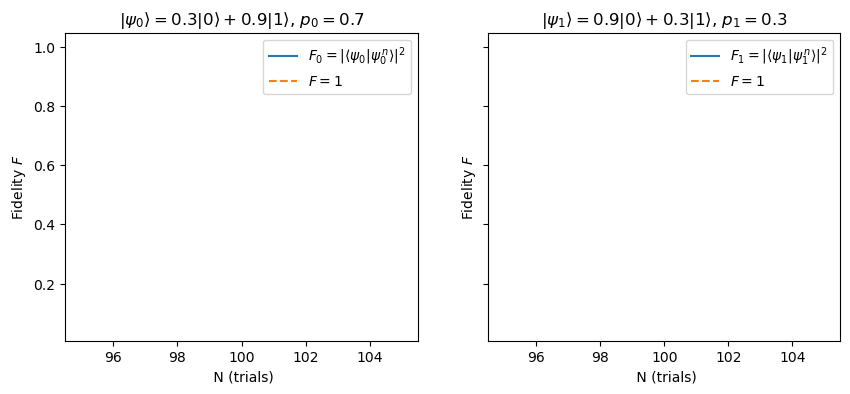

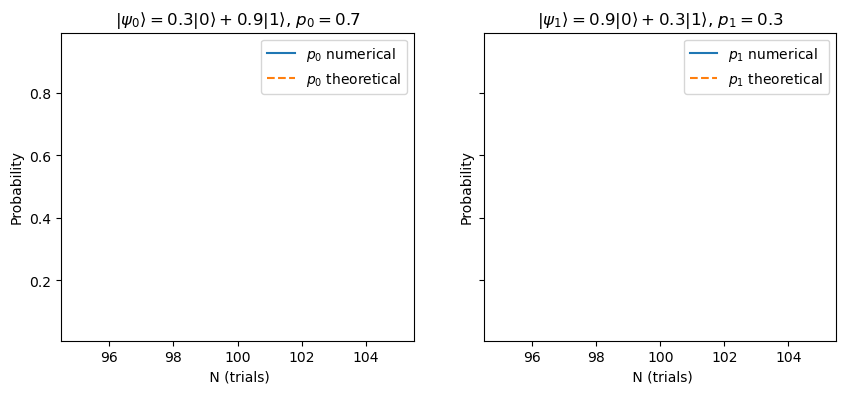

In [ ]:
fig_a, (ax1a, ax2a) = plt.subplots(1,2, figsize=(10,4), sharey=True)
ax1a.plot(trials, outputf[0], label=r'$F_0=|\langle \psi_0|\psi_0^{\,n}\rangle|^2$')
ax1a.plot(trials , pfid, "--", label=r'$F=1$')
ax1a.set_xlabel(' N (trials)')
ax1a.set_ylabel(r'Fidelity $F$')
ax1a.set_title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $p_0={}$'.format(roundc(coeff[0],1), roundc(coeff[1],1), priors[0]))
ax1a.legend(loc='best')
ax2a.plot(trials, outputf[1], label=r'$F_1=|\langle \psi_1|\psi_1^{\,n}\rangle|^2$')
ax2a.plot(trials , pfid, "--", label=r'$F=1$')
ax2a.set_xlabel(' N (trials)')
ax2a.set_ylabel(r'Fidelity $F$')
ax2a.set_title(r'$|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $p_1={}$'.format(roundc(coeff[2],1), roundc(coeff[3],1), priors[1]))
ax2a.legend(loc='best')

 
fig_c, (ax1c, ax2c) = plt.subplots(1,2, figsize=(10,4), sharey=True)
ax1c.plot(trials, outputp[0], label=r'$p_{0}$ numerical')
ax1c.plot(trials, p0trials, '--', label=r'$p_{0}$ theoretical')
ax2c.plot(trials, outputp[1], label=r'$p_{1}$ numerical')
ax2c.plot(trials, p1trials, '--', label=r'$p_{1}$ theoretical')
ax1c.set_xlabel(' N (trials)')
ax2c.set_xlabel(' N (trials)')
ax1c.set_ylabel(r'Probability')
ax2c.set_ylabel(r'Probability')
ax1c.legend(loc='best')
ax2c.legend(loc='best')
ax1c.set_title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $p_0={}$'.format(roundc(coeff[0],1), roundc(coeff[1],1), priors[0]))
ax2c.set_title(r'$|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $p_1={}$'.format(roundc(coeff[2],1), roundc(coeff[3],1), priors[1]))

plt.show()